In [2]:
#pip install --upgrade threadpoolctl

### Import packages

In [3]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt

### Graphical parameters

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 6) # (w, h)

### Set path for dataset

In [10]:
path = ""

### Import dataset into pandas dataframe and sort by stock + date

In [11]:
df = pd.read_csv(path + "stocks.csv")
df = df.sort_values(by=['PERMNO', "date"])
print(df.shape)
df.head()

(50400, 6)


,PERMNO,date,TICKER,RET,vwretd,sector_1dgt
0,10104,2007-01-31,ORCL,0.001167,0.019387,7
1,10104,2007-02-28,ORCL,-0.042541,-0.014006,7
2,10104,2007-03-30,ORCL,0.103469,0.012954,7
3,10104,2007-04-30,ORCL,0.036955,0.039834,7
4,10104,2007-05-31,ORCL,0.030851,0.038953,7


### Table of each firm's activity sector

In [14]:
sectors = df[['TICKER', 'sector_1dgt']].drop_duplicates() # 1 row per stock with columns |TICKER|sector_1dgt|
sectors.head()

,TICKER,sector_1dgt
0,ORCL,7
168,MSFT,7
336,TROW,6
504,ADM,2
672,FISV,7


### Rearrange data to get dates in first column and one stock per column

In [17]:
df1 = df.pivot_table(index ='date', columns = 'TICKER', values = 'RET')
print(df1.shape)
df1.head()

(168, 300)


TICKER,A,AAP,AAPL,ADBE,ADI,ADM,ADP,ADS,ADSK,AEP,...,WHR,WMB,WMT,WYNN,XEC,XEL,XLNX,XRAY,YUM,ZION
date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,-0.081779,0.067210,0.010490,-0.054718,-0.003651,0.001252,-0.031066,0.087402,0.080573,0.022311,...,0.101301,0.033308,0.032698,0.190623,0.026849,0.011709,0.020580,0.033166,0.023129,0.028869
2007-02-28,-0.007813,-0.007905,-0.013064,0.009776,0.108702,0.077031,0.042540,-0.121154,-0.058783,0.040432,...,-0.030515,-0.000741,0.013001,-0.122785,-0.069104,0.012859,0.058025,0.022698,-0.034494,0.011200
2007-03-30,0.061102,0.025498,0.098097,0.062420,-0.045167,0.068413,-0.022513,0.032161,-0.086270,0.085746,...,-0.037411,0.058584,-0.023598,-0.032238,0.062267,0.054274,0.004293,0.039632,0.002071,-0.010073
2007-04-30,0.020184,0.068742,0.074158,-0.003357,0.119745,0.054496,0.023777,0.033106,0.097606,0.030154,...,0.248734,0.036543,0.020660,0.077483,0.064290,-0.024301,0.145744,0.020153,0.070983,-0.032182
2007-05-31,0.110562,0.005340,0.214339,0.060156,-0.057742,-0.091602,0.110366,0.224002,0.101284,-0.043807,...,0.057059,0.080000,-0.002087,-0.055865,0.067766,-0.047323,-0.029851,0.082008,0.094730,-0.011125


### Build train and test set

In [22]:
train = df1.iloc[:134]# first 134 observations of stocks 
test = df1.iloc[134:]# next observations until end of dataframe
train_dates = train.index.to_list()

### Compute each stock's cumulated return for graphical display

In [23]:
cum_ret = train.cumsum()
cum_ret.head()

TICKER,A,AAP,AAPL,ADBE,ADI,ADM,ADP,ADS,ADSK,AEP,...,WHR,WMB,WMT,WYNN,XEC,XEL,XLNX,XRAY,YUM,ZION
date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,-0.081779,0.067210,0.010490,-0.054718,-0.003651,0.001252,-0.031066,0.087402,0.080573,0.022311,...,0.101301,0.033308,0.032698,0.190623,0.026849,0.011709,0.020580,0.033166,0.023129,0.028869
2007-02-28,-0.089592,0.059305,-0.002574,-0.044942,0.105051,0.078283,0.011474,-0.033752,0.021790,0.062743,...,0.070786,0.032567,0.045699,0.067838,-0.042255,0.024568,0.078605,0.055864,-0.011365,0.040069
2007-03-30,-0.028490,0.084803,0.095523,0.017478,0.059884,0.146696,-0.011039,-0.001591,-0.064480,0.148489,...,0.033375,0.091151,0.022101,0.035600,0.020012,0.078842,0.082898,0.095496,-0.009294,0.029996
2007-04-30,-0.008306,0.153545,0.169681,0.014121,0.179629,0.201192,0.012738,0.031515,0.033126,0.178643,...,0.282109,0.127694,0.042761,0.113083,0.084302,0.054541,0.228642,0.115649,0.061689,-0.002186
2007-05-31,0.102256,0.158885,0.384020,0.074277,0.121887,0.109590,0.123104,0.255517,0.134410,0.134836,...,0.339168,0.207694,0.040674,0.057218,0.152068,0.007218,0.198791,0.197657,0.156419,-0.013311


<Axes: xlabel='date'>

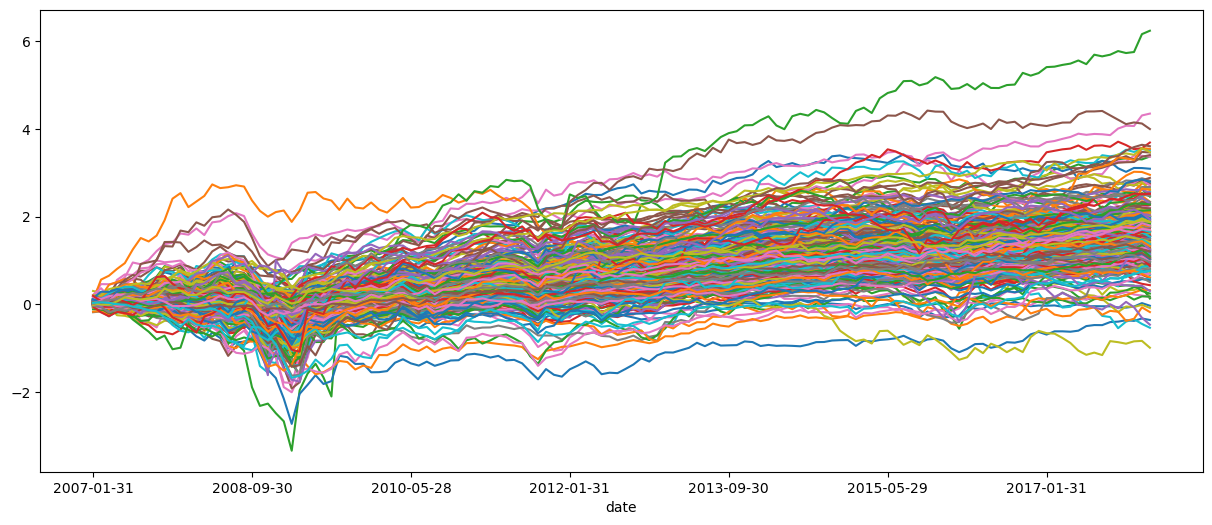

In [24]:
cum_ret.plot(legend=False) # legend=False to disable legend display due to the high number of stocks (300)

### Rearrange data with stocks in rows and returns in columns to treat returns as stock features

In [32]:
data_pivot = train.transpose()
print(data_pivot.shape)
data_pivot.head()

(300, 134)


date,2007-01-31,2007-02-28,2007-03-30,2007-04-30,2007-05-31,2007-06-29,2007-07-31,2007-08-31,2007-09-28,2007-10-31,...,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-29,2017-10-31,2017-11-30,2017-12-29,2018-01-31,2018-02-28
TICKER,,,,,,,,,,,,,,,,,,,,,
A,-0.081779,-0.007813,0.061102,0.020184,0.110562,0.007074,-0.007544,-0.045872,0.013187,-0.000814,...,0.096094,-0.014882,0.008093,0.082455,-0.008035,0.061713,0.017786,-0.030633,0.096461,-0.065913
AAP,0.067210,-0.007905,0.025498,0.068742,0.005340,-0.020039,-0.142117,0.022721,-0.054556,0.016686,...,-0.059871,-0.127067,-0.039283,-0.125971,0.013892,-0.176008,0.235625,-0.012376,0.173538,-0.023421
AAPL,0.010490,-0.013064,0.098097,0.074158,0.214339,0.007005,0.079646,0.051002,0.108247,0.237701,...,0.067804,-0.057214,0.032704,0.106905,-0.060244,0.096808,0.020350,-0.015246,-0.010636,0.067610
ADBE,-0.054718,0.009776,0.062420,-0.003357,0.060156,-0.088745,0.003487,0.061057,0.021287,0.097114,...,0.060715,-0.002961,0.035704,0.059185,-0.038541,0.174152,0.036024,-0.034331,0.139922,0.046906
ADI,-0.003651,0.108702,-0.045167,0.119745,-0.057742,0.039492,-0.058183,0.045416,-0.019523,-0.074668,...,0.125459,-0.087570,0.015553,0.058980,0.035258,0.059534,-0.051917,0.033910,0.032012,-0.018829


### Compute 8 clusters based on return behavior on the train period

In [44]:
from sklearn.cluster import KMeans
kmeans =KMeans(init = "k-means++", n_clusters = 8, random_state=1).fit(data_pivot)# intantiate KMeans with 8 clusters, random_state=0. Then train model (fit method)
clusters = pd.DataFrame(kmeans.cluster_centers_)
clusters 

/home/alexis/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,0.033437,-0.006502,-0.008636,0.060079,0.022841,0.005031,-0.013688,0.024872,0.023489,0.005328,...,0.031605,-0.024317,0.021176,0.005738,0.050248,0.037539,0.030244,0.016873,0.063878,-0.011832
1,0.029191,0.002435,0.015921,0.033590,0.017955,-0.034877,-0.035320,0.036845,0.030155,0.025465,...,0.013831,-0.008083,0.021909,0.002105,0.002921,-0.006502,0.046476,-0.006301,0.020255,-0.052015
2,-0.044795,-0.017166,0.001639,0.040018,0.037119,-0.031933,-0.083536,0.028358,0.028030,-0.066962,...,0.044656,-0.012416,0.046865,-0.075936,0.020337,0.052452,-0.071970,-0.001001,0.072843,-0.102941
3,0.059339,0.009412,0.016101,0.059409,0.030703,-0.015325,-0.013958,0.020316,0.044411,0.034431,...,-0.003380,0.038255,0.009853,-0.005858,0.044767,-0.002671,0.025242,0.013252,0.009491,-0.049817
4,0.045071,-0.004003,0.006941,0.041430,0.051072,-0.012758,-0.029024,0.008010,0.035336,0.057652,...,0.015371,0.028271,0.010437,-0.000015,0.030480,0.020434,0.049436,0.010647,0.063267,-0.044140
5,0.062798,0.005817,-0.017030,0.034476,-0.002222,-0.079870,-0.059387,0.028797,0.079856,0.010504,...,-0.032097,0.042206,0.042062,-0.044093,0.035570,-0.001404,0.062739,-0.004295,-0.002266,-0.074442
6,0.037271,0.027986,0.062348,0.059333,0.099503,0.023453,-0.017013,-0.015025,0.106313,0.109286,...,-0.075029,-0.000732,0.015744,-0.075941,0.138747,-0.004538,0.026713,0.052783,0.020164,-0.111943
7,0.003492,-0.014081,-0.013519,0.011276,0.014362,-0.036572,-0.068198,0.009275,-0.015361,-0.040478,...,-0.018936,0.075543,0.006673,-0.036680,0.079511,0.025060,0.037480,0.030612,0.083730,-0.016851


### <u>Question</u>: give the interpretation of each row in the *clusters* table

time series of the equally weighted portfolio of the stocks that are  of the clusters equally weighted portfolio 

R(p,t) = 1/n_0 somme_i R(i,t)

### Transpose table so as to get centroid returns in colums and plot cumulated returns by cluster

In [46]:
clust_data = clusters.T# transposed "clusters" table
nb_clusters = clusters.shape[0] # retrieve number of clusters
New_labels=["Cluster " + str(x) for x in range(nb_clusters)] # Create cluster names
clust_data.columns = New_labels
clust_data.head()

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
0,0.033437,0.029191,-0.044795,0.059339,0.045071,0.062798,0.037271,0.003492
1,-0.006502,0.002435,-0.017166,0.009412,-0.004003,0.005817,0.027986,-0.014081
2,-0.008636,0.015921,0.001639,0.016101,0.006941,-0.017030,0.062348,-0.013519
3,0.060079,0.033590,0.040018,0.059409,0.041430,0.034476,0.059333,0.011276
4,0.022841,0.017955,0.037119,0.030703,0.051072,-0.002222,0.099503,0.014362


<Axes: xlabel='date'>

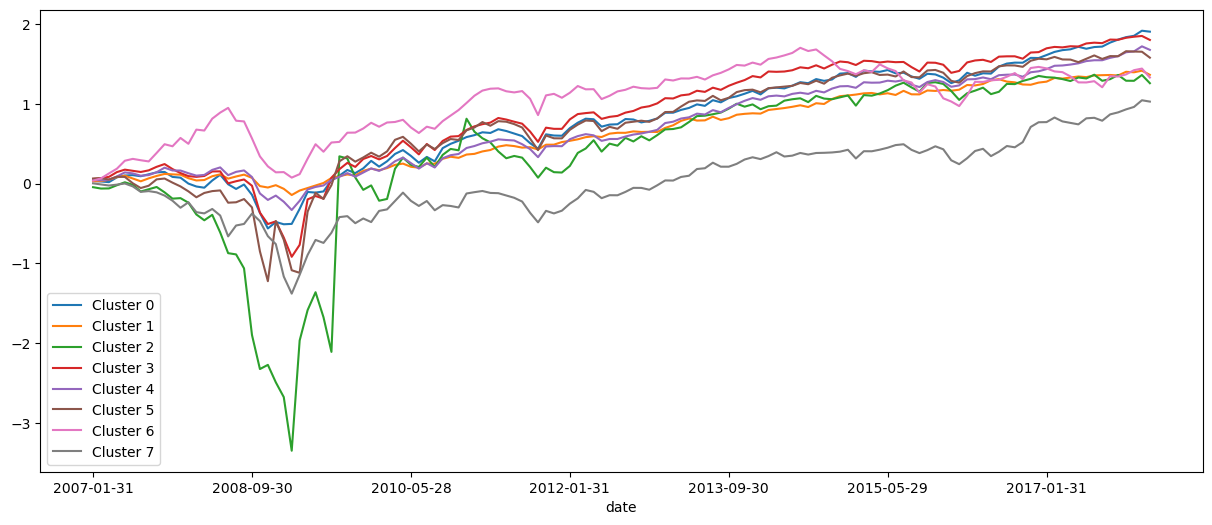

In [47]:
cum_ret = clust_data.cumsum() # compute cumulated returns
dates = data_pivot.columns # retrieve dates. Objective : create plot with dates on horizontal axis
cum_ret["date"] = dates # add date column in cum_ret
cum_ret = cum_ret.set_index(["date"]) # set "date" column as the index (will be considered as x values in plot)
cum_ret.plot()

### Retrieve the cluster a firm belongs to

In [48]:
clust = kmeans.predict(data_pivot)# use kmeans object predict method
clust

array([4, 1, 0, 4, 0, 1, 1, 4, 0, 1, 4, 3, 2, 3, 4, 4, 0, 0, 1, 4, 1, 0,
       4, 0, 1, 3, 0, 4, 6, 0, 0, 1, 4, 3, 1, 4, 7, 1, 0, 0, 1, 4, 4, 4,
       4, 1, 1, 4, 4, 3, 7, 1, 3, 1, 4, 1, 6, 1, 1, 4, 1, 1, 1, 7, 4, 0,
       1, 4, 1, 7, 6, 0, 1, 1, 0, 4, 4, 0, 0, 1, 1, 4, 1, 0, 4, 1, 1, 4,
       4, 1, 1, 1, 6, 0, 1, 4, 1, 3, 4, 1, 6, 0, 4, 1, 4, 1, 1, 4, 3, 3,
       4, 4, 1, 0, 1, 4, 7, 0, 4, 6, 1, 4, 4, 1, 1, 0, 1, 4, 0, 0, 4, 3,
       4, 6, 4, 7, 3, 1, 4, 5, 4, 6, 4, 1, 1, 4, 4, 4, 4, 4, 0, 1, 3, 0,
       3, 3, 4, 1, 7, 0, 1, 7, 5, 0, 1, 0, 1, 1, 4, 1, 1, 4, 5, 4, 0, 4,
       1, 5, 0, 4, 1, 0, 1, 3, 1, 6, 1, 4, 7, 0, 4, 1, 4, 1, 4, 4, 6, 1,
       4, 4, 4, 0, 3, 1, 6, 4, 4, 1, 6, 1, 1, 4, 4, 1, 4, 1, 1, 1, 5, 1,
       1, 4, 4, 4, 5, 7, 1, 1, 1, 5, 0, 4, 6, 4, 4, 4, 7, 4, 6, 4, 1, 1,
       0, 4, 5, 3, 1, 3, 1, 1, 4, 0, 4, 0, 6, 4, 1, 1, 1, 0, 0, 1, 4, 4,
       4, 4, 0, 3, 4, 4, 1, 3, 4, 4, 0, 3, 7, 4, 4, 4, 4, 3, 1, 1, 1, 1,
       4, 0, 1, 7, 3, 6, 1, 3, 6, 1, 0, 4, 4, 7], d

### Count the number of firms in each cluster

In [52]:
data_temp = data_pivot.copy() # we want to leave data_pivot untouched
data_temp["cluster"] = clust# assign to each firm the cluster it belongs to based on 'clust' array
# count number of firms per cluster using 'groupby'
data_temp.groupby("cluster")["cluster"].count()

cluster
0    45
1    94
2     1
3    24
4    97
5     8
6    17
7    14
Name: cluster, dtype: int64

### Do clusters match activity sector of firms?

In [60]:
data_temp2 = pd.DataFrame(data_temp["cluster"]).reset_index() # keep cluster values only
match_sector = data_temp2.merge(sectors)# merge data_temp2 with sectors table
# report nobs, mean, min, max and std of sector for each cluster
match_sector.groupby("cluster")["sector_1dgt"].agg(["count", "mean", "min", "max", "std"])

,count,mean,min,max,std
cluster,,,,,
0,45,4.222222,1,7,1.743675
1,94,4.180851,1,8,1.771718
2,1,6.000000,6,6,NaN
3,24,4.500000,2,7,1.693979
4,97,4.319588,1,8,1.753249
5,8,6.000000,6,6,0.000000
6,17,1.705882,1,4,1.104802
7,14,6.000000,6,6,0.000000


### <u>Question</u>: do clusters match the activity sector of firms?

### Returns of equally-weighted portfolio from each cluster

In [ ]:
PF = data_temp/
PF_cumret = # compute cumulated returns of each portfolio
PF_cumret.plot()

### <u>Question</u>: compare with centroid cumulated returns graph. Why do we get the same graphs?

### How many clusters?

In [ ]:
error = []
for i in np.arange(1, 50):
    kmeans = # train model with i clusters. Set random_state to 0 to get comparable results
    #append computed error to error list
errors = pd.DataFrame(error)

In [ ]:
plt.plot(np.arange(1, 50), error, "b-")

Elbow rule: To determine the optimal number of clusters, we have to select the value of k at the “elbow” i.e. the point after which the inertia starts decreasing in a linear fashion. No clear k here... 10 seems to be a reasonable choice however.

In [73]:
kmeans_optim = KMeans(n_clusters=10, random_state=0).fit(data_pivot)
clusters = pd.DataFrame(kmeans_optim.cluster_centers_)

clust_data = clusters.T
nb_clusters = clusters.shape[0] # retrieve number of clusters
New_labels=["Cluster " + str(x) for x in range(nb_clusters)] # Build cluster names
clust_data.columns = New_labels
clust_data.head()

/home/alexis/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9
0,0.063200,0.016244,0.069607,0.068972,-0.012223,-0.044795,0.037456,0.009992,0.046974,0.067301
1,0.001482,0.011776,0.024461,0.340145,-0.030141,-0.017166,0.003132,-0.025652,-0.003837,-0.014744
2,0.008978,0.025417,-0.018146,0.044775,0.008376,0.001639,0.032910,-0.013100,-0.003163,-0.005136
3,0.056769,0.037702,-0.002002,0.096510,0.106183,0.040018,0.058887,0.020394,0.036417,0.011150
4,0.032510,0.010779,0.004938,0.150842,0.043908,0.037119,0.055683,0.025078,0.038279,0.016933


<Axes: xlabel='date'>

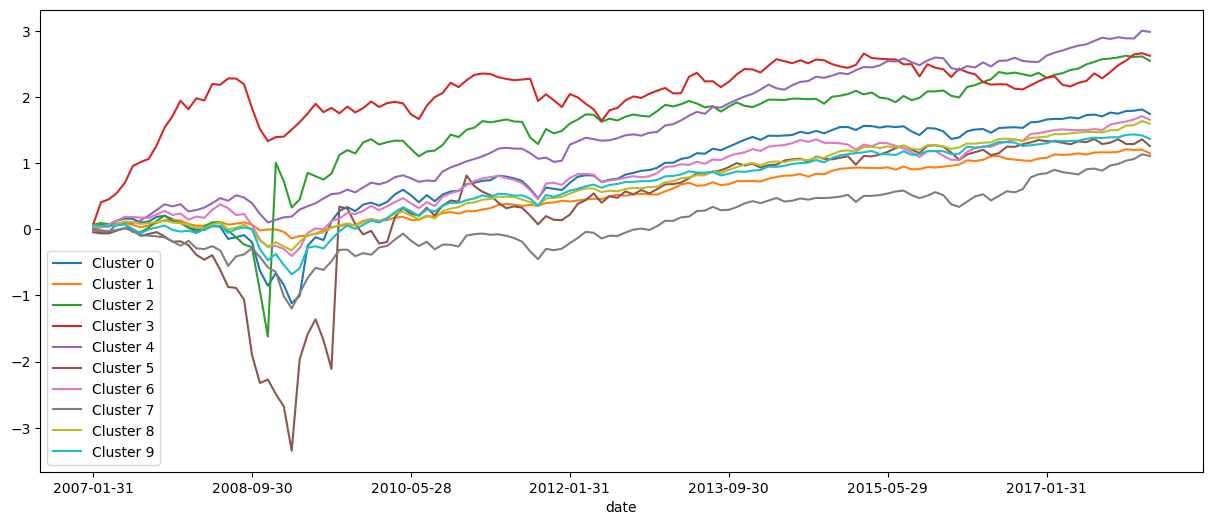

In [74]:
cum_ret = clust_data.cumsum() # compute cumulated returns
dates = data_pivot.columns # retrieve dates. Objective : create plot with dates on horizontal axis
cum_ret["date"] = dates # create date column in cum_ret
cum_ret = cum_ret.set_index(["date"]) # set "date" column as the index (will be considered as x values in plots)
cum_ret.plot()

### Number of stocks in each cluster

In [75]:
data_temp = data_pivot.copy() # we want to leave data_pivot untouched
data_temp["cluster"] = kmeans_optim.predict(data_pivot)
nb_stocks = data_temp.groupby("cluster")["cluster"].count()
nb_stocks

cluster
0     18
1     55
2      1
3      3
4     16
5      1
6     55
7     18
8    102
9     31
Name: cluster, dtype: int64

### Select the most representative stock within each cluster, i.e. the one closest to the cluster centroid

In [76]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans_optim.cluster_centers_, data_pivot)
closest

array([152, 157, 224, 185, 262,  12,  87,  63, 126,  49])

In [77]:
best_fits = data_pivot.iloc[closest, :] #for each cluster, select the stock that is closest to the cluster centroid
cum_best_fits = best_fits.T.cumsum() # compute cumulated returns of each selected stock
cum_best_fits.head()
cum_best_fits.round(decimals=3).head()

TICKER,IP,JNJ,PLD,MOS,TMO,AIG,DOV,CMA,GPC,BXP
date,,,,,,,,,,
2007-01-31,-0.012,0.012,0.070,-0.067,0.057,-0.045,0.012,0.011,0.002,0.127
2007-02-28,0.063,-0.041,0.094,0.210,0.002,-0.062,-0.021,0.029,0.027,0.079
2007-03-30,0.075,-0.083,0.076,0.258,0.035,-0.060,0.000,0.019,0.040,0.063
2007-04-30,0.111,-0.017,0.074,0.364,0.149,-0.020,-0.014,0.066,0.049,0.064
2007-05-31,0.156,-0.026,0.079,0.555,0.198,0.017,0.030,0.081,0.087,0.048


### <u>Question</u>: there are 2 clusters with one stock only. Which stocks are in thse clusters? Does it make sense that these stocks are alone in their cluster?

### Plot of selected stock returns and centroid returns

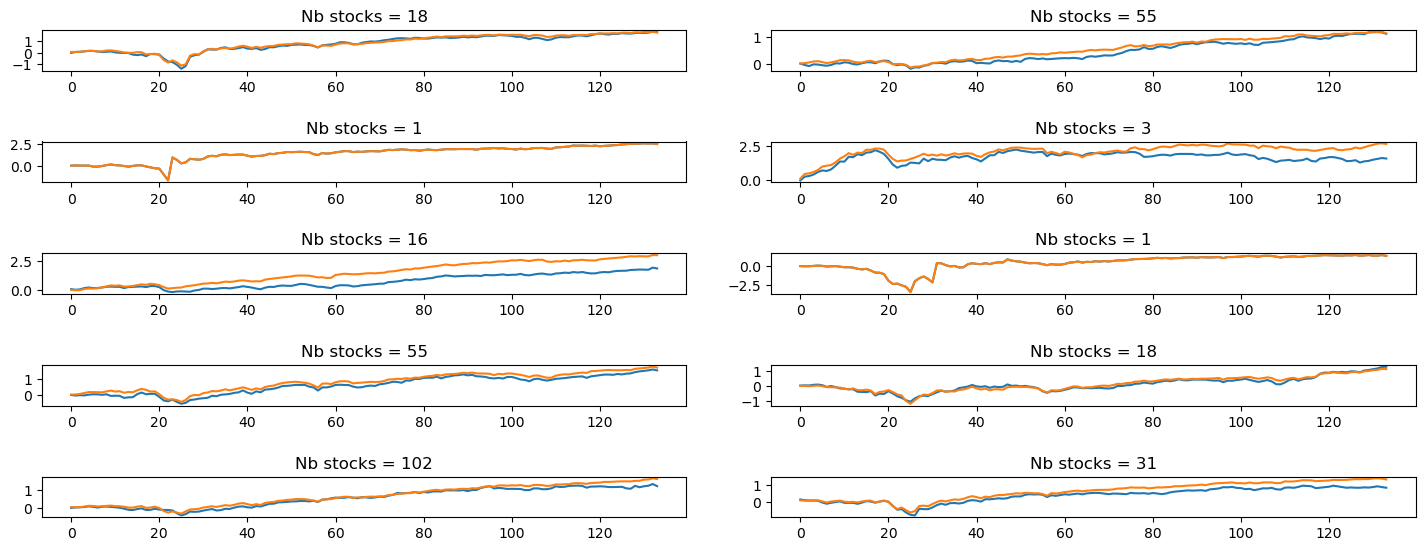

In [78]:
fig, axs = plt.subplots(5, 2)
fig.tight_layout(pad=3.0)
cum_best_fits_cols = cum_best_fits.columns
cum_ret_cols = cum_ret.columns
for i in range(len(cum_best_fits_cols)):
    row = int(i/2)
    j = i%2
    cur_col_best_fits = cum_best_fits_cols[i]
    cur_col_cum_ret = cum_ret_cols[i]
    s = pd.concat([cum_best_fits[cur_col_best_fits],
                   cum_ret[cur_col_cum_ret]], axis=1).reset_index(drop=True) # reset_index + drop otherwise dates
                                                                             # are reported on x axis and are unreadable
    axs[row,j].plot(s)
    axs[row,j].title.set_text("Nb stocks = {}".format(nb_stocks[i]))

### Plot of selected stock returns against centroid returns

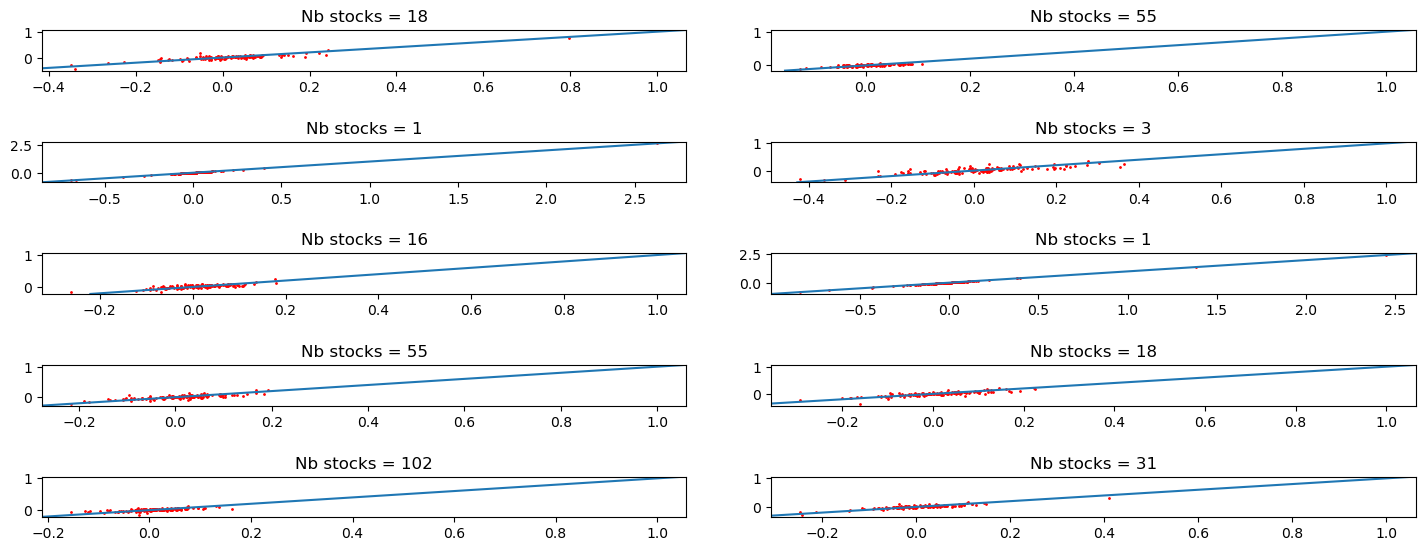

In [79]:
best_fits2 = best_fits.T
best_fits2 = best_fits2.reset_index(drop=True)

fig, axs = plt.subplots(5, 2)
fig.tight_layout(pad=3.0)
best_fits2_cols = best_fits2.columns
ret_cols = clust_data.columns
for i in range(len(best_fits2_cols)):
    row = int(i/2)
    j = i%2
    cur_col_best_fits2 = best_fits2_cols[i]
    cur_col_ret = ret_cols[i]
    s1 = best_fits2[cur_col_best_fits2]
    s2 = clust_data[cur_col_ret]
    axs[row,j].plot(s1,s2, "ro", ms=1)
    axs[row,j].axline([0, 0], [1, 1])
    axs[row,j].title.set_text("Nb stocks = {}".format(nb_stocks[i]))
    

### Can we replicate the whole portfolio (300 stocks) with the 10 representative stocks only?

### Performance on train set

#### Correlation bewteen whole portfolio returns and 10-stock portfolio returns

In [81]:
ret_PF_all = train.mean(axis=1)# compute the time series of returns of the 300-stock equally-weighted porfolio on train set
ret_PF_repr_stocks = best_fits.T.mean(axis =1) # compute the time series of returns of the 10-stock equally-weighted porfolio on train set
# compute the correlation in returns of the two portfolios
ret_PF_all

### <u>Question</u>: what is the quality of the replication of the 300-stock portfolio by the 10-stock portfolio on the train set?

#### Plot of returns

In [ ]:
ret_all_train = pd.DataFrame(ret_PF_all)
ret_repr_train = pd.DataFrame(ret_PF_repr_stocks)
ret_train = pd.concat([ret_all_train, ret_repr_train], axis=1)
ret_train.columns = ['all', 'selected']
ret_train.plot()

### Performance on test set

#### Returns

In [ ]:
ret_PF_all = # compute the time series of returns of the 300-stock equally-weighted porfolio on train set
best_fits = # retrieve the returns of the 10 stocks on the test set
ret_PF_repr_stocks = # compute the time series of returns of the 10-stock equally-weighted porfolio on test set
# compute the correlation in returns of the two portfolios

### <u>Question</u>: what is the quality of the replication of the 300-stock portfolio by the 10-stock portfolio on the test set?

#### Plot of returns

<Axes: xlabel='date'>

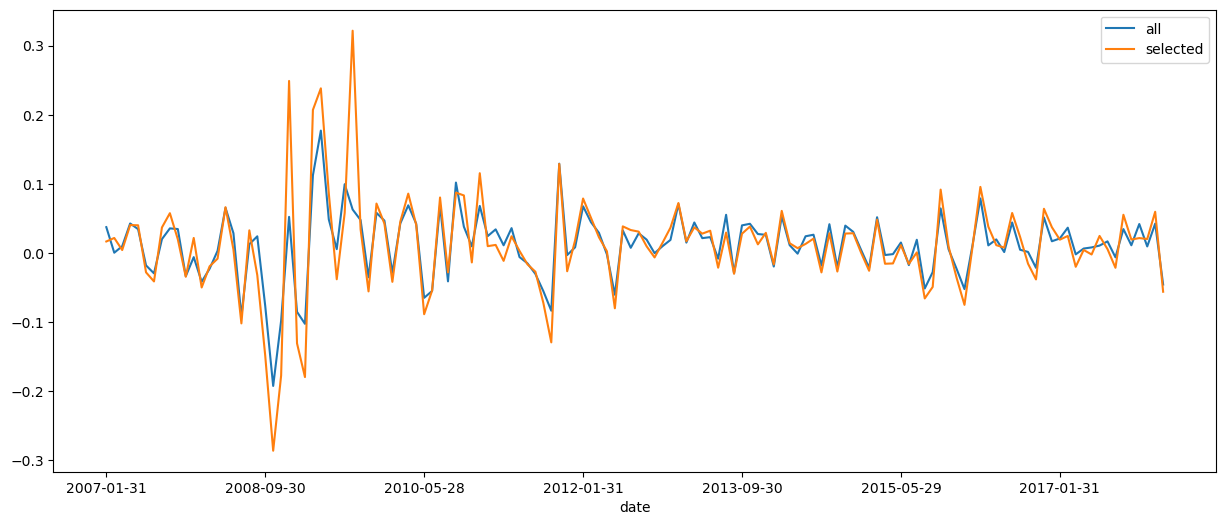

In [82]:
ret_all_test = pd.DataFrame(ret_PF_all)
ret_repr_test = pd.DataFrame(ret_PF_repr_stocks)
ret_test = pd.concat([ret_all_test, ret_repr_test], axis=1)
ret_test.columns = ['all', 'selected']
ret_test.plot()